In [1]:
import numpy as np

from fpcross import ij, Grid, Solver, Model, SolversCheck

ij()

Start |  2:07PM MSK on Oct 15, 2019 | python 3.7.1    |
-------------------------------------------------------


In [2]:
MD = Model.select('fpe_1d_oup')
MD.init(s=1., D=0.5, A=1.).info()

<div class="head0"><div class="head0__name">fpe-1d-oup</div><div class="head0__note">One-dimensional Focker Planck equation (Ornstein–Uhlenbeck process) [FPE, 1D, analytic, analyt-stationary, OUP].</div></div><div class="head2">
                <div class="head2__name">Parameters</div>
                <div class="head2__note"><ul><li>s =   1.0000 [Initial variance]<div>Variance of the initial condition (type: float, default:   1.0000)</div></li><li>D =   0.5000 [Diffusion coefficient]<div>Scalar diffusion coefficient (type: float, default:   0.5000)</div></li><li>A =   1.0000 [Drift]<div>Constant drift coefficient (type: float, default:   1.0000)</div></li></ul></div>
            </div><div class="head1">
                <div class="head1__name">Description</div>
            </div>
Consider
$$
    d x = f(x, t) \, dt + S(x, t) \, d \beta,
    \quad
    d \beta \, d \beta^{\top} = Q(t) dt,
    \quad
    x(0) = x_0 \sim \rho(x, 0) = \rho_0 (x),
$$
$$
    \frac{\partial \rho(x, t)}{\partial t} =
        \sum_{i=1}^d \sum_{j=1}^d
            \frac{\partial^2}{\partial x_i \partial x_j}
            \left[ D_{ij}(x, t) \rho(x, t) \right]
        - \sum_{i=1}^d
            \frac{\partial}{\partial x_i}
            \left[ f_i(x, t) \rho(x, t) \right],
    \quad
     D(x, t) = \frac{1}{2} S(x, t) Q(t) S(x, t)^{\top},
$$
where spatial $d$-dimensional ($d \ge 1$) variable $x \in R^d$ has probability density function (PDF) $\rho(x, t)$, $\beta$ is Brownian motion of dimension $q$ ($q \ge 1$, and we assume below that $q = d$), $f(x, t) \in R^d$ is a vector-function, $S(x, t) \in R^{d \times q}$ and $Q(t) \in R^{q \times q}$ are matrix-functions and $D(x, t) \in R^{d \times d}$ is a diffusion tensor.

Let
$$
    Q(t) \equiv I,
    \,
    S(x, t) \equiv \sqrt{2 D_c} I
    \implies
    D(x, t) \equiv D_c I,
$$
and
$$
    d = 1,
    \quad
    x \in \Omega,
    \quad
    \rho(x, t) |_{\partial \Omega} \approx 0,
    \quad
    f(x, t) = A (\mu - x),
    \quad
    \mu \equiv 0,
    \quad
    \rho_0(x) = \frac{1}{\sqrt{2 \pi s}}\exp{\left[-\frac{x^2}{2s}\right]}.
$$

This equation has exact solution for the $d$-dimensional case ([see this paper](https://advancesindifferenceequations.springeropen.com/articles/10.1186/s13662-019-2214-1))
$$
    \rho(x, t, x_0) =
        \frac{1}{\sqrt{ | 2 \pi \Sigma(t) | }}
        exp \left[
            -\frac{1}{2} (x - M(t, x_0))^T \Sigma^{-1}(t) (x - M(t, x_0))
        \right],
$$
where $x_0$ is an initial condition and
$$
    M(t, x_0) = e^{-A t} x_0 + \left( I - e^{-A t} \right) \mu,
$$
$$
    \Sigma(t) = \int_0^t e^{A (s-t)} S S^T e^{A^T (s-t)} \, d  s,
$$
or in a more simple form for the case $d=1$
$$
    \rho(x, t, x_0) =
        \frac{1}{\sqrt{ | 2 \pi \Sigma(t) | }}
        exp \left[
            -\frac{(x - M(t, x_0))^2}{2 \Sigma(t)}
        \right],
    \quad
    M(t, x_0) = e^{-A t} x_0,
    \quad
    \Sigma(t) = \frac{1 - e^{-2 A t}}{2 A}.
$$

We can rewrite the solution $\rho(x, t, x_0)$ in terms of the initial PDF $\rho_0(x)$ as
$$
    \rho(x, t) = \int_{-\infty}^{\infty}
        \rho(x, t, x_0) \rho_0(x_0) \, d x_0,
$$
which after accurate computations leads to the following analytic solution
$$
    \rho(x, t) =
        \frac
            {
                1
            }
            {
                \sqrt{2 \pi \left( \Sigma(t) + s e^{-2 A t} \right)}
            }
        \exp{\left[
            - \frac
                {
                    x^2
                }
                {
                    2 \left( \Sigma(t) + s e^{-2 A t} \right)
                }
        \right]},
$$
and the stationary solution ($t \rightarrow \infty$) is
$$
    \rho_{stat}(x) =
        \sqrt{
            \frac{A}{\pi}
        }
        e^{-A x^2}.
$$
        <div class="note">The Ornstein–Uhlenbeck process is mean-reverting (the solution tends to its long-term mean $\mu$ as time $t$ tends to infinity) if $A > 0$ and this process at any time is a normal random variable.</div><div class="end"></div>

In [3]:
TG = Grid(d=1, n=1000, l=[+0., +8.], kind='u')
SG = Grid(d=1, n= 101, l=[-6., +6.], kind='c')
SL = Solver(TG, SG, MD)
SL.init()
SL.prep()
SL.calc()
SL.info()

Solve: 100%|█| 999/999 [00:03<00:00, 307.50step/s, | At T=8.0e+00 : er=9.3e-06 es=9.3e-06]

------------------ Solver
Format    : 1D, NP [order=2]
Time sec  : prep = 1.47e-02, calc = 3.20e+00
Err real  : 9.28e-06
Err stat  : 9.33e-06


In [ ]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': True }
SL.plot_t(-3.0, opts)
SL.plot_t(+0.0, opts)
SL.plot_t(+3.0, opts)

In [ ]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': True }
SL.plot_x(+0.1, opts)
SL.plot_x(+2.5, opts)
SL.plot_x(None, opts)

<div class="head1">
    <div class="head1__name">
        Results for multiple computations
    </div>
    <div class="head1__note">
        We use results that already saved to file (see computation code in notebook `multi_solve.ipynb`).
    </div>
</div>

In [4]:
SLC = SolversCheck('./../computations/data/fpe_1d_oup')
SLC.load()

name1 = 'Solver (ord=1)'
name2 = 'Solver (ord=2)'

M = SLC.res[name2]['M']
N = SLC.res[name2]['N']

m = M[-1]
n = N[-1]

<div class="head2">
    <div class="head2__name">
        Dependence on the number of time points
    </div>
    <div class="head2__note">
        We present results for NP-solver of the 2th order.
    </div>
</div>

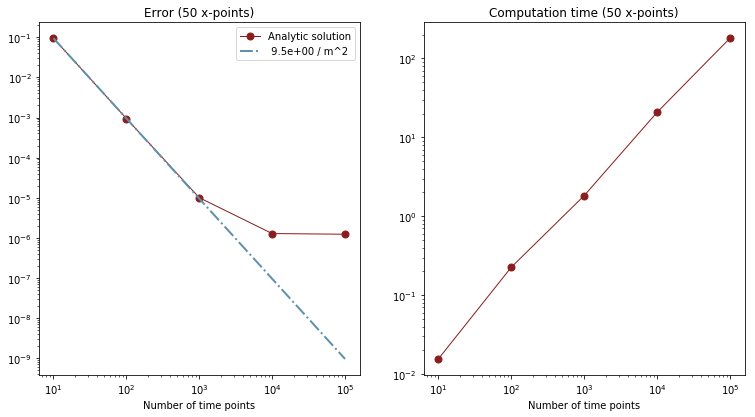

In [6]:
SLC.plot(name2, n=n, is_stat=False, lims={ 'all': [0, None] })

<div class="head2">
    <div class="head2__name">
        Dependence on the number of spatial points
    </div>
    <div class="head2__note">
        We present results for NP-solver of the 2th order.
    </div>
</div>

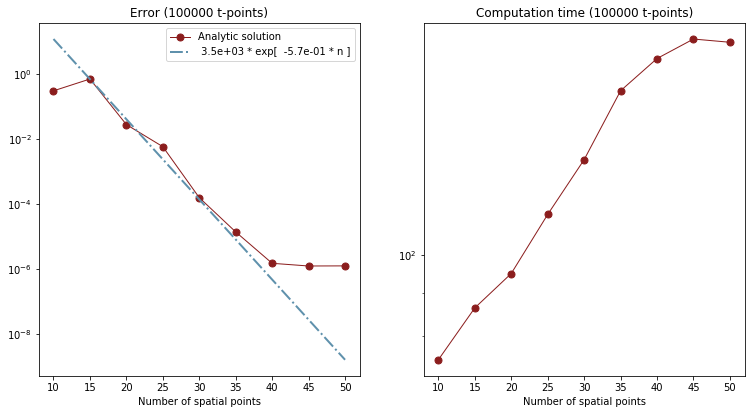

In [7]:
SLC.plot(name2, m=m, is_stat=False, lims={ 'all': [1, None] })

<div class="head2">
    <div class="head2__name">
        Dependence on the solver order
    </div>
    <div class="head2__note">
        We present results (dependencies on the number of time and spatial points) for NP-solvers of various orders.
    </div>
</div>

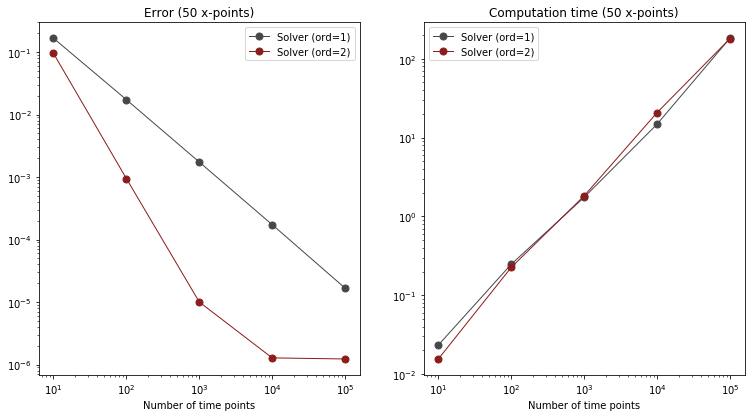

In [8]:
SLC.plot_all(n=n, is_stat=False)

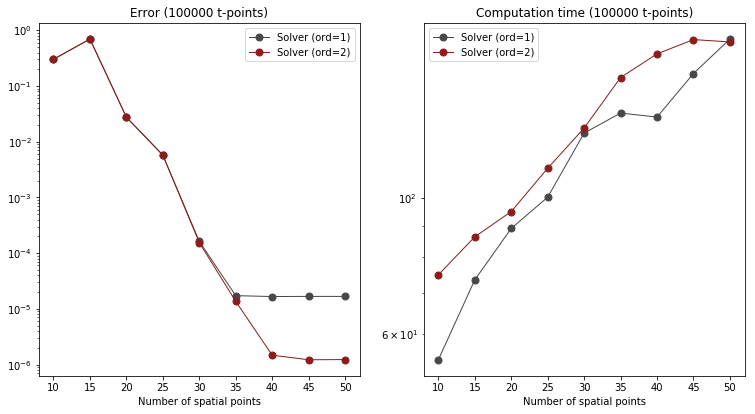

In [9]:
SLC.plot_all(m=m, is_stat=False)

<div class="head1">
    <div class="head1__name">
        Explicit (simple) solvers
    </div>
    <div class="head1__note">
        Only for example and tests.
    </div>
</div>

In [13]:
import time
import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
from scipy.linalg import expm as expm
import matplotlib.pyplot as plt

from intertrain import Intertrain

In [14]:
d = 1
m = t_poi
n = x_poi
l = (x_max - x_min) / (x_poi - 1)
h = (t_max - t_min) / (t_poi - 1)
T = np.linspace(t_min, t_max, t_poi)

In [15]:
def show_x(X, r_calc, _time):
    X = X.reshape(1, -1)
    r_init = func_r0(X)
    r_real = func_rt(X, t_max)
    r_stat = func_rs(X)
    e = np.linalg.norm(r_real - r_calc) / np.linalg.norm(r_real)

    print('Number of spatial points : %8d'%x_poi)
    print('Number of time points    : %8d'%t_poi)
    print('Error (relative norm)    : %-12.2e'%e)
    print('Total time (sec)         : %-12.2e'%_time)
    print()
    
    plt.plot(
        X.reshape(-1), r_init, '--', label='Initial',
        linewidth=3, color='tab:blue'
    )
    plt.plot(
        X.reshape(-1), r_calc, label='Calculated',
        linewidth=1, color='tab:green', marker='o', markersize=7,
        markerfacecolor='lightgreen', markeredgecolor='g'
    )
    plt.plot(
        X.reshape(-1), r_real, label='Analytic',
        linewidth=3, color='black'
    )
    plt.plot(
        X.reshape(-1), r_stat, '--', label='Stationary',
        linewidth=2, color='magenta'
    )
    
    plt.title('Solution at the final time step')
    plt.xlabel('x')
    plt.ylabel('r')
    plt.legend(loc='best')
    plt.semilogy()
    plt.show()

<div class="head2">
    <div class="head2__name">
        Uniform spatial grid and the 1st order splitting
    </div>
</div>

We can solve equation on the uniform spatial grid for the time $t > 0$ with step $h$ and uniform spatial grid with step $l$ using 2th order finite difference scheme

$$
    \frac{\partial \rho}{\partial t} = (D + \widehat{Q}) \rho,
$$
where
$$
    \widehat{Q} \rho = f Q \rho - \frac{\partial f}{\partial x} \rho,
$$

$$
    D = \frac{D_{coef}}{l^2} tridiag \left( 1, -2, 1 \right),
    \quad
    Q = \frac{1}{2 l} tridiag \left( -1, 0, 1 \right).
$$

Let apply the 1th order splitting method on the time step $(k+1)$
$$
    \frac{\partial v}{\partial t} = D v,
    \quad
    v_{k} = \rho_{k},
    \quad
    v_{k+1} = v = ?,
$$
$$
    \frac{\partial w}{\partial t} = \widehat{Q} w,
    \quad
    w_{k} = v,
    \quad
    w_{k+1} = \rho_{k+1} = ?,
$$
and solve both ODEs by the 1th order Euler method.

Number of spatial points :      101
Number of time points    :     1000
Error (relative norm)    : 6.92e-03    
Total time (sec)         : 1.38e-01    



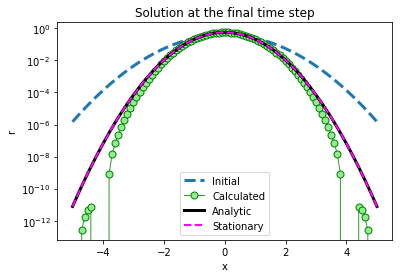

In [16]:
_time = time.time()

X = np.linspace(x_min, x_max, x_poi).reshape(1, -1)

Q = sp.spdiags([
        [-1.] * n,
        [+1.] * n
    ], [-1,  1], n, n).tocsr().toarray()
Q = Q * (0.5 / l)

D = sp.spdiags([
        [+1.] * x_poi,
        [-2.] * x_poi,
        [+1.] * x_poi
    ], [-1, 0, 1], x_poi, x_poi
).tocsr().toarray()
D = D * D_coef / l / l

J = np.eye(n); J[0, 0] = 0.; J[-1, -1] = 0.
ZD = h * D
ZQ = h * Q

r = func_r0(X)
r = r.reshape(-1, 1)
for t in T[1:]:
    F0 = np.diag(func_f0(X, t).reshape(-1))
    F1 = np.diag(func_f1(X, t).reshape(-1))
    v1 = r + ZD @ r
    w1 = v1 - F0 @ ZQ @ v1 - h * F1 @ v1
    r = w1

show_x(X, r.reshape(-1), time.time() - _time)

<div class="end"></div>